In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'
df = pd.read_csv(url)

In [44]:
print("Forma del dataset:", df.shape)
df.head()

Forma del dataset: (3140, 108)


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [46]:
df.columns.tolist()

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

In [47]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [48]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

fips                      0.0
TOT_POP                   0.0
0-9                       0.0
0-9 y/o % of total pop    0.0
19-Oct                    0.0
                         ... 
CKD_prevalence            0.0
CKD_Lower 95% CI          0.0
CKD_Upper 95% CI          0.0
CKD_number                0.0
Urban_rural_code          0.0
Length: 108, dtype: float64

No hay nulos


In [49]:
df.duplicated().sum()

np.int64(0)

No hay duplicados

In [50]:
df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


Dado que nuestro objetivo es analizar la relación entre los recursos sanitarios y los datos socio demográficos, es crucial elegir una variable de salud que sea representativa y esté influenciada por estos factores. Basándonos en el resumen estadístico que proporcionaste y en la disponibilidad de datos, consideramos las siguientes opciones:
1. Prevalencia de Diabetes (diabetes_prevalence)

    Rango en el dataset: 6.1% a 25.6%

    Media: 13.07%

    **Justificación:**

        La diabetes es una enfermedad crónica prevalente y su incidencia está influenciada por factores socio demográficos como la edad, el nivel educativo y el acceso a servicios de salud.

        La diabetes está asociada con otras condiciones de salud y puede ser un indicador de la calidad y accesibilidad del sistema sanitario.

2. Prevalencia de Enfermedad Renal Crónica (CKD_prevalence)

    Rango en el dataset: 1.8% a 6.2%

    Media: 3.45%

    Justificación:

        La enfermedad renal crónica (CKD) es una condición de salud significativa, especialmente entre adultos mayores.

        La prevalencia de CKD varía por región y está influenciada por factores como la diabetes y la hipertensión .

        Sin embargo, la menor variabilidad en los datos podría limitar la capacidad del modelo para capturar relaciones significativas.

### Recomendación: Dado el rango más amplio y la mayor variabilidad en los datos, decidimos utilizar diabetes_prevalence como variable objetivo para el modelo de regresión. Esto permitirá una mejor exploración de cómo los factores socio demográficos y los recursos sanitarios influyen en la prevalencia de la diabetes a nivel de condado.

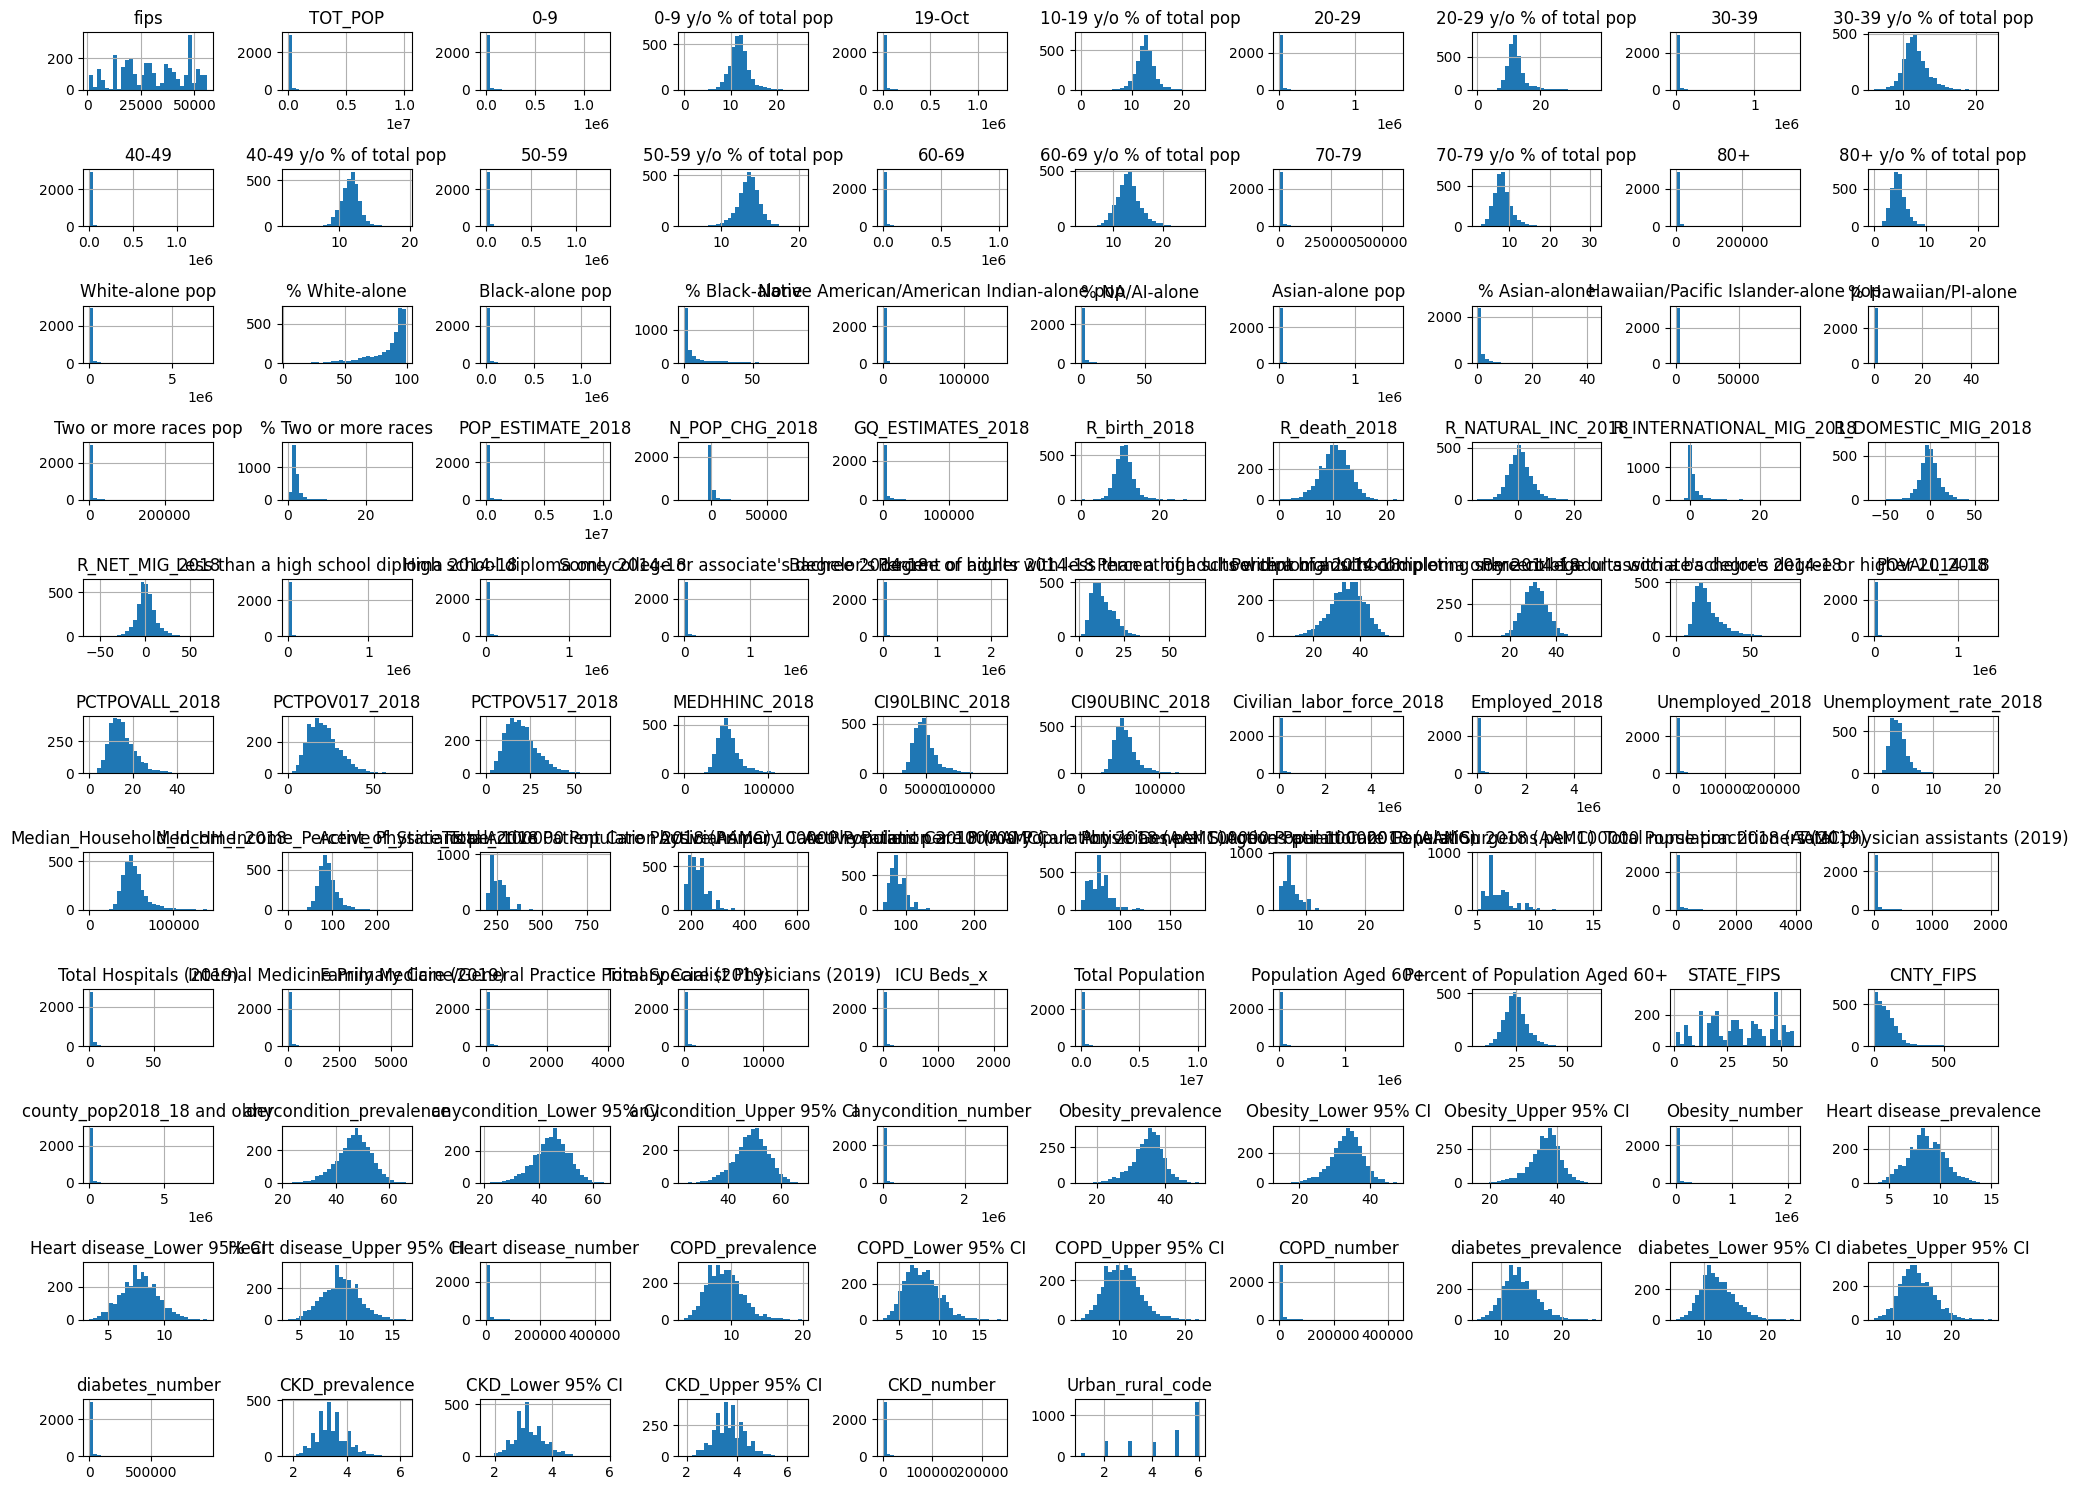

In [51]:
import matplotlib.pyplot as plt

# Histograma de todas las columnas numéricas
df.hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()

**¿Qué podemos ver en estos histogramas?**
1. Distribuciones sesgadas (skewed)

    Muchas variables tienen una distribución sesgada a la derecha (long tail a la derecha), como:

        TOT_POP (total población)

        MEDHHINC_2018 (ingreso medio por hogar)

        Primary care physicians (2019)

        Total Hospitals

        COPD_number, diabetes_number, CKD_number

Estas variables tienen muchos valores pequeños y pocos condados con valores extremadamente grandes (ciudades muy pobladas).  

2. Variables normales o casi normales

    Algunas variables tienen una distribución más simétrica, lo que es útil para regresión lineal:

        % of Population Aged 60+

        Obesity_prevalence

        diabetes_prevalence (¡buena señal si la usamos como target!)

        CKD_prevalence

Estas variables son buenas candidatas tanto para usar como features como para la variable objetivo porque no requieren mucha transformación.
3. Variables categóricas o discretas codificadas como numéricas

    Urban_rural_code: solo tiene unos pocos valores repetidos (1–6). Es una variable categórica codificada.

    STATE_FIPS y CNTY_FIPS también son códigos geográficos y no deben usarse como predictores directamente.

4. Variables de % o proporciones

    Muchas variables están en formato de porcentaje:

        % White-alone, % Black-alone, % Asian-alone, etc.

        % with bachelor’s degree or higher, % in poverty, etc.

        Obesity_prevalence, diabetes_prevalence, etc.

Estas variables son ideales para correlacionarlas con nuestra variable objetivo (diabetes_prevalence), ya que están normalizadas.


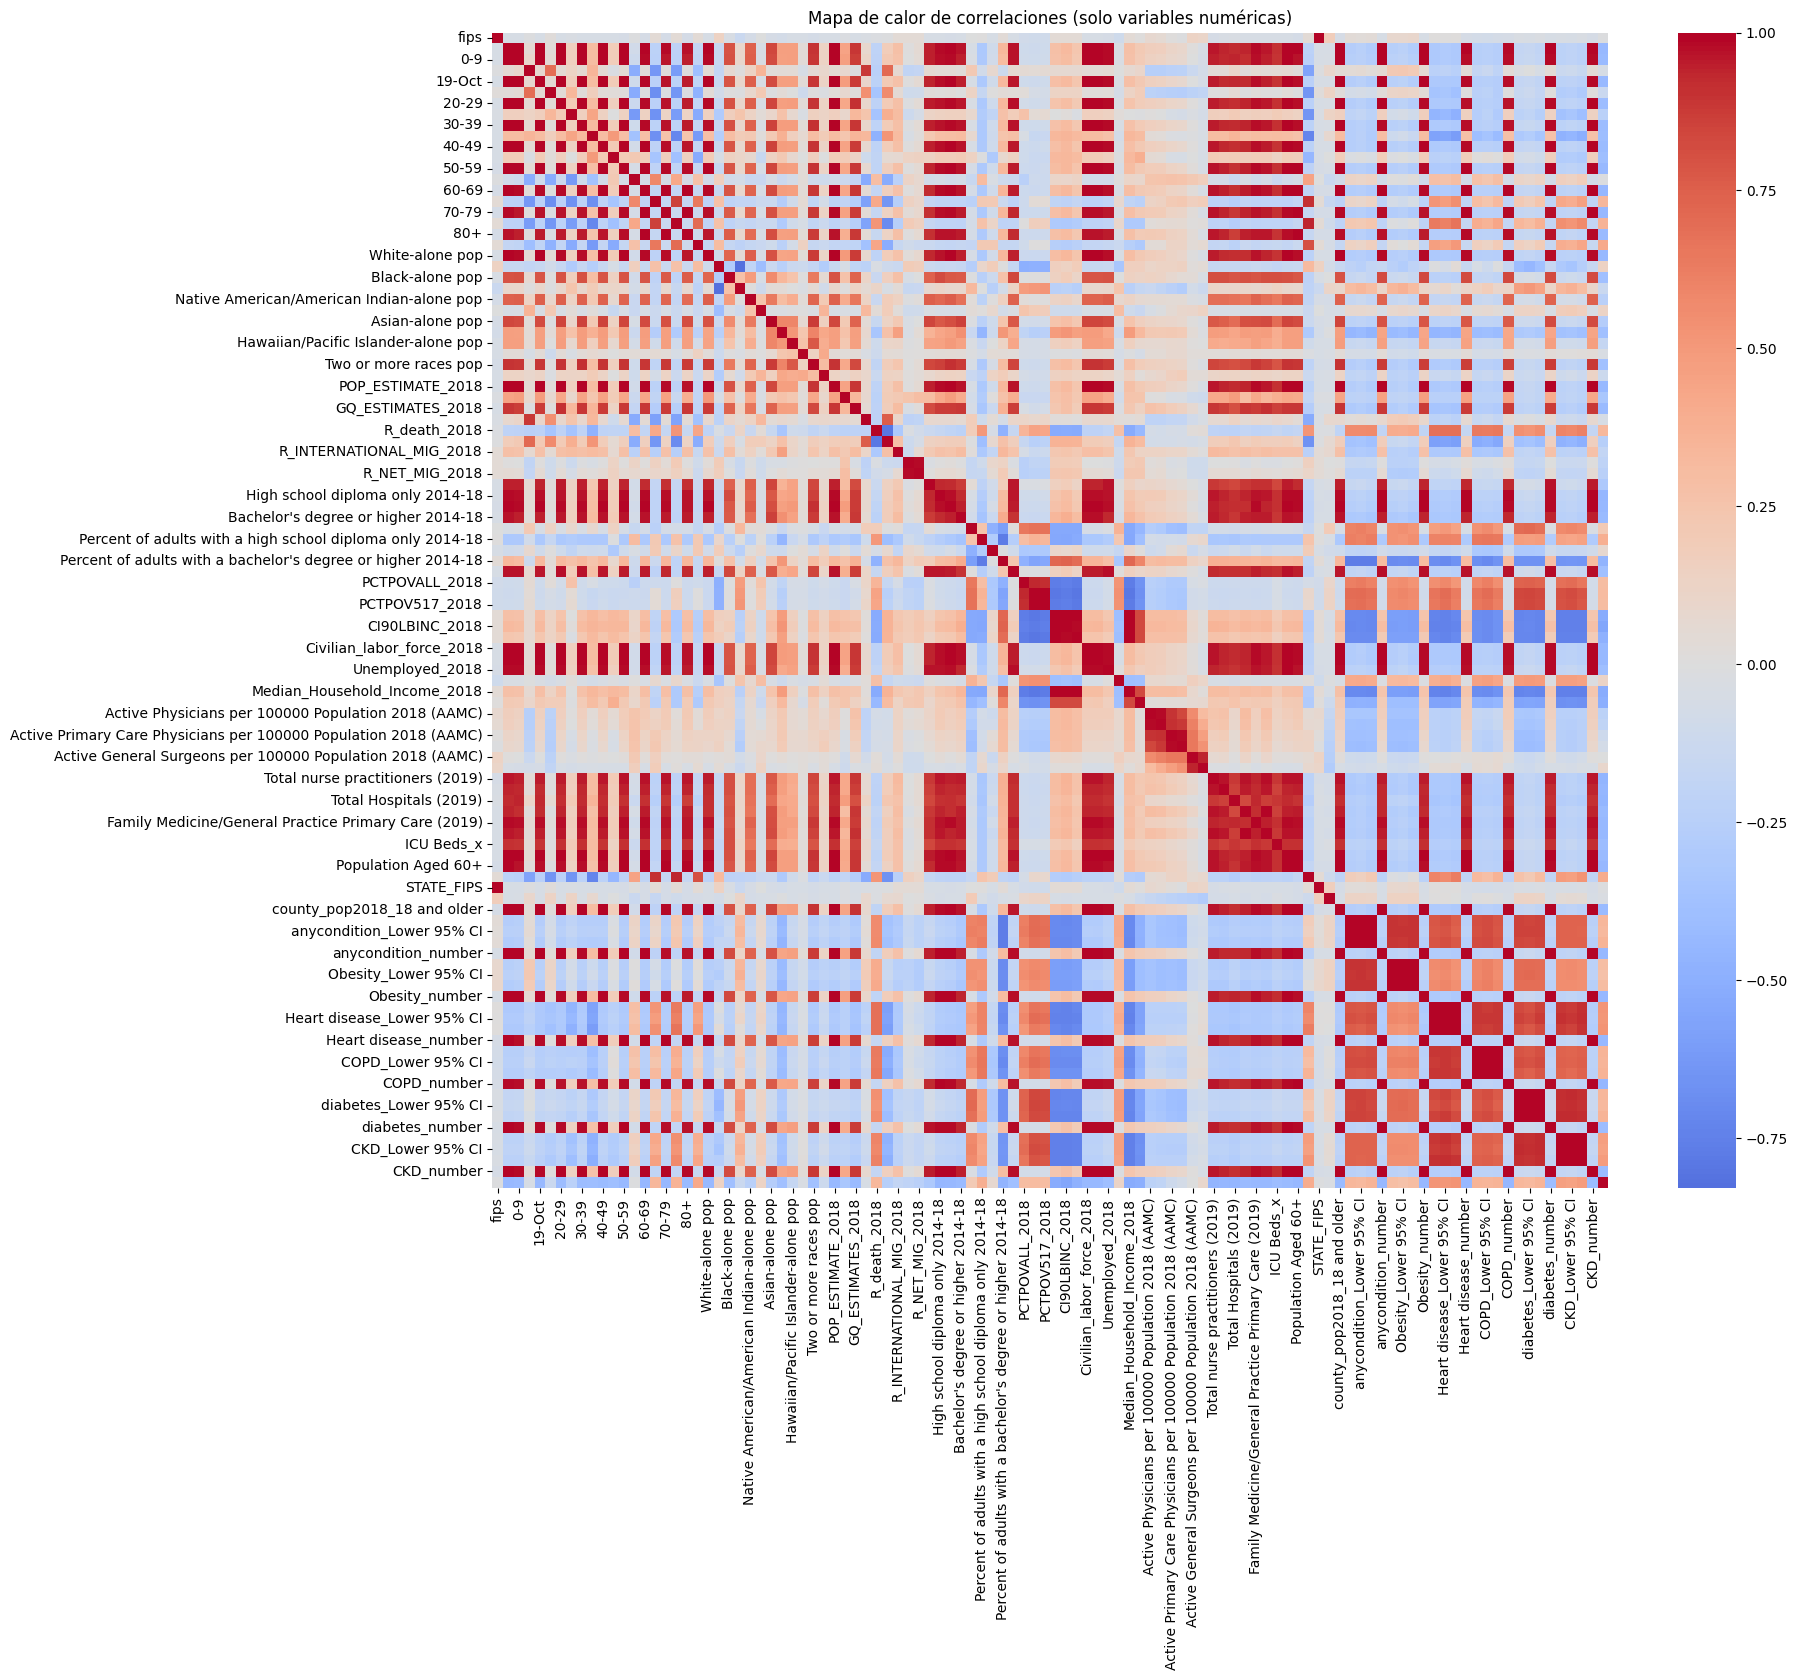

In [52]:
# Filtrar solo las columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Verificar que 'diabetes_prevalence' está incluida
assert 'diabetes_prevalence' in df_numeric.columns

# Crear mapa de calor de correlaciones
plt.figure(figsize=(18,15))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', center=0)
plt.title('Mapa de calor de correlaciones (solo variables numéricas)')
plt.show()


In [53]:
# Mostrar correlaciones con 'diabetes_prevalence'
cor_target = df_numeric.corr()['diabetes_prevalence'].sort_values(ascending=False)
cor_target

diabetes_prevalence                                             1.000000
diabetes_Upper 95% CI                                           0.998409
diabetes_Lower 95% CI                                           0.998069
CKD_Lower 95% CI                                                0.924630
CKD_prevalence                                                  0.918514
                                                                  ...   
Percent of adults with a bachelor's degree or higher 2014-18   -0.669985
CI90UBINC_2018                                                 -0.720364
CI90LBINC_2018                                                 -0.720820
Median_Household_Income_2018                                   -0.723316
MEDHHINC_2018                                                  -0.723316
Name: diabetes_prevalence, Length: 106, dtype: float64

**Correlaciones positivas fuertes (↑ más → ↑ diabetes).**  

Variable	            Correlación	    Interpretación
CKD_prevalence	           0.92	           La enfermedad renal está fuertemente asociada a la diabetes
CKD_Lower 95% CI	       0.92	           Alta relación (esperable, ya que es parte del mismo indicador)
diabetes_Lower/Upper CI	  ~0.998	       Muy correlacionados con la propia variable objetivo (no usarlos como features)  


**Correlaciones negativas fuertes (↑ más → ↓ diabetes).**  


Variable	                                   Correlación	                       Interpretación
MEDHHINC_2018 o Median_Household_Income_2018	  -0.72	             A mayores ingresos, menos prevalencia de diabetes
CI90LBINC_2018, CI90UBINC_2018	                  ~-0.72	         Intervalos de confianza del ingreso familiar
% with bachelor’s degree or higher 2014-18	       -0.67	          Más educación → menos diabetes  


**Selección de Variables Predictoras (Features)**.   

Vamos a excluir:  

    Variables casi idénticas entre sí (ej: CI90LBINC y CI90UBINC)

    Intervalos de confianza de la variable objetivo

    Variables no explicativas (como fips, STATE_FIPS, etc.)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definir features y target
features = [
    'CKD_prevalence',
    'Obesity_prevalence',
    'Heart disease_prevalence',
    'Unemployment_rate_2018',
    "Percent of adults with a bachelor's degree or higher 2014-18",
    'Median_Household_Income_2018',
    'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
    'Urban_rural_code'  # Si esta también está disponible
]

target = 'diabetes_prevalence'


X = df[features]
y = df[target]

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Escalado
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
from sklearn.linear_model import LinearRegression

# Entrenar modelo
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones en train y test
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# Métricas en train
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Métricas en test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Mostrar resultados
print("🔹 TRAINING SET")
print("MSE:", mse_train)
print("R²:", r2_train)

print("\n🔹 TEST SET")
print("MSE:", mse_test)
print("R²:", r2_test)


🔹 TRAINING SET
MSE: 0.5790715385997268
R²: 0.9202248015503266

🔹 TEST SET
MSE: 0.6093350432192458
R²: 0.9242417591079216


La diferencia entre train y test es mínima, lo que significa que el modelo generaliza bien a nuevos datos.

El modelo no está sobreajustado (overfitted) ni subajustado (underfitted).

Es estable y fiable para explicar la prevalencia de diabetes a partir de las variables que seleccionaste

**MSE:** 0.61 → el error cuadrático medio es bajo, lo que indica que el modelo hace predicciones bastante precisas.

**R²:** 0.92 → el modelo explica el 92% de la variabilidad de la prevalencia de diabetes. 

In [60]:
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt

# Valores de alpha a probar
alphas = np.linspace(0, 20, 100)
r2_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    r2 = lasso.score(X_test_scaled, y_test)
    r2_scores.append(r2)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.273e+02, tolerance: 1.823e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  mod

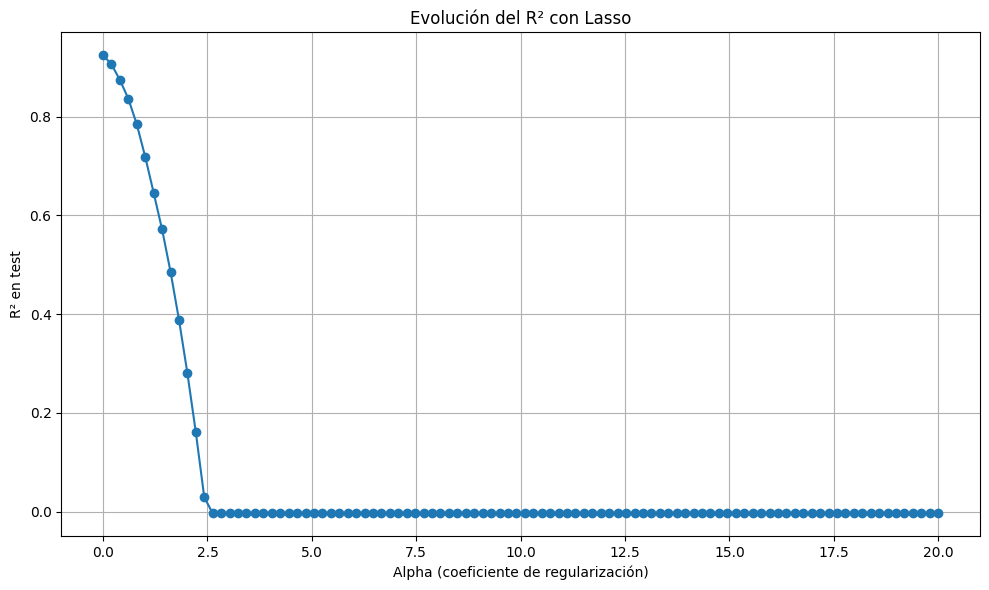

In [61]:
# Graficar R² vs alpha
plt.figure(figsize=(10,6))
plt.plot(alphas, r2_scores, marker='o')
plt.xlabel('Alpha (coeficiente de regularización)')
plt.ylabel('R² en test')
plt.title('Evolución del R² con Lasso')
plt.grid(True)
plt.tight_layout()
plt.show()


In [62]:
# Entrenar modelo Lasso con alpha óptimo
lasso = Lasso(alpha=1, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=1, max_iter=10000)

In [63]:
# Predicciones
y_pred_lasso = lasso.predict(X_test_scaled)

In [64]:

# Evaluación
print("🔹 LASSO con alpha = 1")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R²:", r2_score(y_test, y_pred_lasso))

🔹 LASSO con alpha = 1
MSE: 2.234281349515877
R²: 0.7222132116297827


In [65]:
# Coeficientes
coefficients = pd.Series(lasso.coef_, index=features)
print("\nCoeficientes del modelo Lasso:")
print(coefficients)


Coeficientes del modelo Lasso:
CKD_prevalence                                                      1.423593
Obesity_prevalence                                                  0.086337
Heart disease_prevalence                                            0.000000
Unemployment_rate_2018                                              0.000000
Percent of adults with a bachelor's degree or higher 2014-18       -0.000000
Median_Household_Income_2018                                       -0.000000
Active Primary Care Physicians per 100000 Population 2018 (AAMC)   -0.000000
Urban_rural_code                                                    0.000000
dtype: float64


In [66]:
# Lasso con alpha = 0.5
lasso_half = Lasso(alpha=0.5, max_iter=10000)
lasso_half.fit(X_train_scaled, y_train)

# Predicciones y evaluación
y_pred_half = lasso_half.predict(X_test_scaled)

print("🔹 LASSO con alpha = 0.5")
print("MSE:", mean_squared_error(y_test, y_pred_half))
print("R²:", r2_score(y_test, y_pred_half))

# Coeficientes
coefficients_half = pd.Series(lasso_half.coef_, index=features)
print("\nCoeficientes del modelo Lasso (alpha=0.5):")
print(coefficients_half)


🔹 LASSO con alpha = 0.5
MSE: 1.1437063460092942
R²: 0.8578037126947334

Coeficientes del modelo Lasso (alpha=0.5):
CKD_prevalence                                                      1.745005
Obesity_prevalence                                                  0.407720
Heart disease_prevalence                                            0.000000
Unemployment_rate_2018                                              0.000000
Percent of adults with a bachelor's degree or higher 2014-18       -0.000000
Median_Household_Income_2018                                       -0.000000
Active Primary Care Physicians per 100000 Population 2018 (AAMC)   -0.000000
Urban_rural_code                                                   -0.000000
dtype: float64


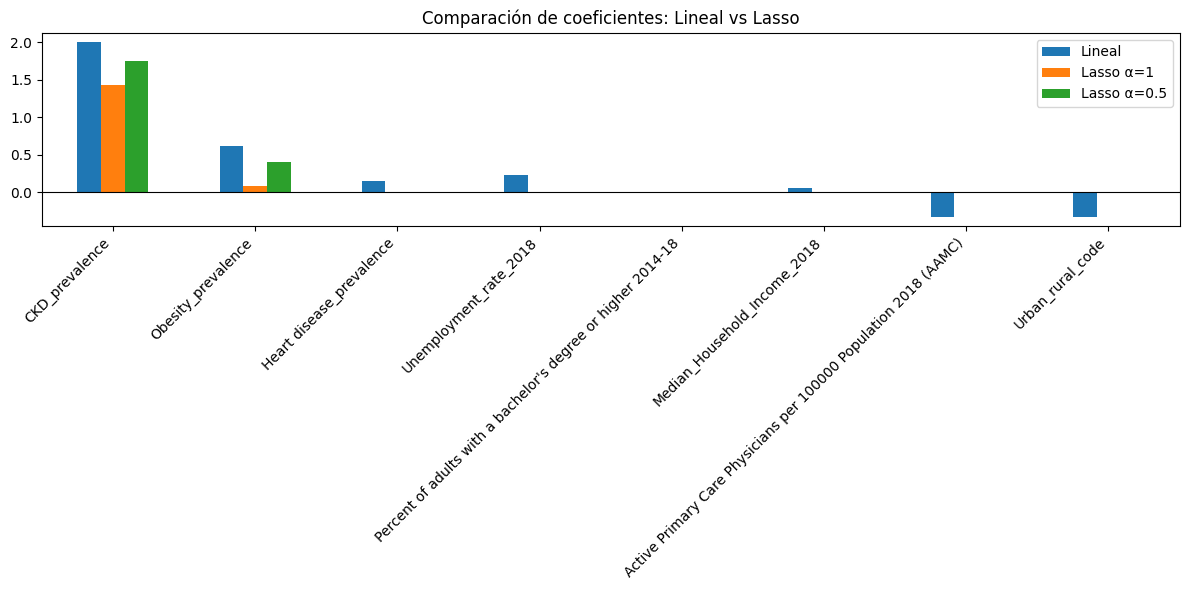

In [67]:
import matplotlib.pyplot as plt

# Regresión lineal original
lr.fit(X_train_scaled, y_train)
coefficients_lr = pd.Series(lr.coef_, index=features)

# Crear DataFrame comparativo
df_coefs = pd.DataFrame({
    'Lineal': coefficients_lr,
    'Lasso α=1': coefficients,
    'Lasso α=0.5': coefficients_half
})

# Plot
df_coefs.plot(kind='bar', figsize=(12,6))
plt.title("Comparación de coeficientes: Lineal vs Lasso")
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Conclusiones del Proyecto

En este análisis se estudió la relación entre variables socio demográficas y de recursos sanitarios con la prevalencia de diabetes a nivel de condado en EE. UU. utilizando modelos de regresión lineal y Lasso.
🔹 Principales hallazgos:

    El modelo de regresión lineal base explicó un 92% de la variabilidad en la prevalencia de diabetes (R² = 0.92), destacando por su alto poder explicativo.

    Variables como CKD_prevalence (enfermedad renal crónica) y Obesity_prevalence (obesidad) mostraron una fuerte correlación positiva con la diabetes.

    El modelo Lasso con α = 1 redujo el número de variables a solo dos, pero su desempeño bajó significativamente (R² = 0.72).

    Usando Lasso con α = 0.5, se mantuvieron esas mismas dos variables con un mejor equilibrio entre simplicidad y precisión (R² = 0.86).

📌 Conclusión:

    La prevalencia de enfermedades crónicas relacionadas (como CKD y obesidad) son los predictores más potentes de la diabetes a nivel de condado.

    El modelo Lasso permite simplificar sin perder demasiado rendimiento, siendo útil para identificar los factores clave de intervención.

**Modelos de regresión**

    Con regresión lineal, predecimos la prevalencia de diabetes con un R² de 0.92, lo cual confirma que:

    Las variables explicativas sí tienen capacidad predictiva sobre una variable de salud.

    Lasso demostró que, incluso simplificando el modelo, con solo dos variables se puede mantener una buena precisión (R² = 0.86).

Esto demuestra que las condiciones de salud están relacionadas estrechamente con variables socio demográficas y sanitarias.  

**Conclusión final**

Sí, hay una relación clara entre los datos socio demográficos, los recursos de salud y una condición concreta de salud pública como la diabetes.

    Las variables más relevantes fueron prevalencia de obesidad y enfermedad renal crónica (CKD).

    También se observó que el nivel educativo y el ingreso medio se correlacionan negativamente, aunque Lasso los descartó por ser menos predictivos frente a otras variables más directas.



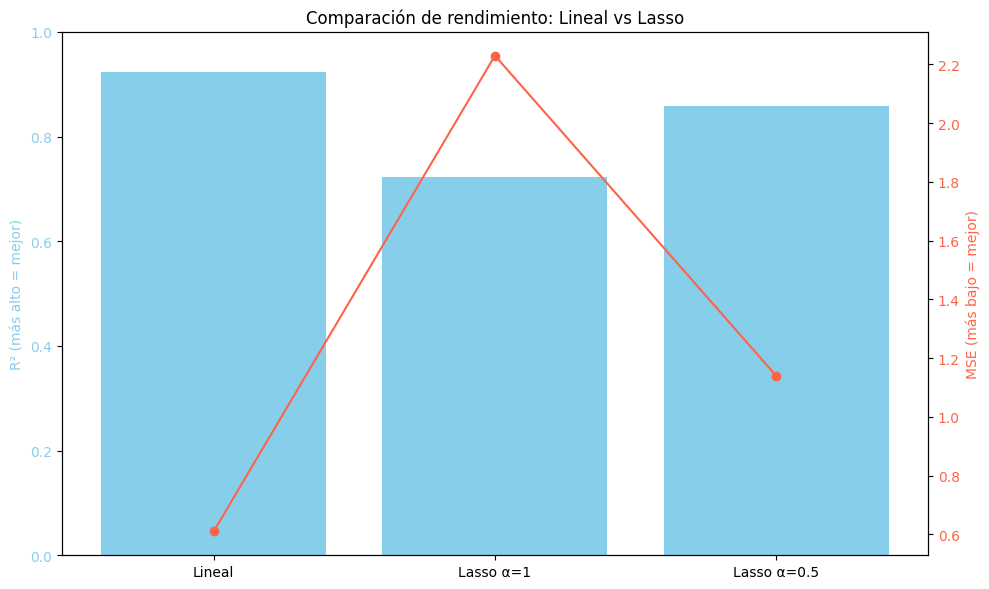

In [ ]:
import matplotlib.pyplot as plt

# Métricas 
model_names = ['Lineal', 'Lasso α=1', 'Lasso α=0.5']
r2_scores = [0.924, 0.722, 0.858]
mse_scores = [0.61, 2.23, 1.14]

# Crear gráfico
fig, ax1 = plt.subplots(figsize=(10,6))

# R²
ax1.bar(model_names, r2_scores, color='skyblue', label='R²')
ax1.set_ylabel('R² (más alto = mejor)', color='skyblue')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='y', labelcolor='skyblue')

# MSE (en otro eje)
ax2 = ax1.twinx()
ax2.plot(model_names, mse_scores, color='tomato', marker='o', label='MSE')
ax2.set_ylabel('MSE (más bajo = mejor)', color='tomato')
ax2.tick_params(axis='y', labelcolor='tomato')

plt.title('Comparación de rendimiento: Lineal vs Lasso')
plt.tight_layout()
plt.show()
